Guia ADP 2_3

In [5]:
import numpy.random as rdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

1-Generar Muestras:
1. Considere  una  variablex∼U(0,10)  y  generen=  100  muestras  de x
2. Considerey=  3x+  2  +εdondeε∼N(0,1)  y  genere  100  muestras  apartir  de  las  anteriores.

In [27]:
x=rdm.rand(100)*10 #rand(100) me da 100 valores aleatorios entre 0 y 1
#luego los multiplico por 10 para tener valores aleatorios entre 0, y 10
y=3*x + 2 + rdm.randn(100) #hago una recta perfecta de pendinte 3 y ordenada 2 pero le agrego un ruido con randn entre 0 y1

2-Evalue:
    1.  Seleccione  el  80%  de  los  pares  (x,  y)  en  un  conjunto TRAIN y  el  20% restante  en TEST.
    2.  Use  los  datos  enT  RAINpara  ajustar  regresiones  lineales  de  grado0,1,  .  .  .  ,25  y  el  otro  conjunto  para  evaluar  el  error  cuadr  ́atico  medio.
    3. Que  modelo  da  mejor?
    4. Repita  100  veces  la  generacion  de  muestras  y  selecci  ́on  de  modelo:Da  siempre  el  mismo  resultado?

In [7]:
x_y=np.array([x,y]) #creo el conjunto de pares x y

In [8]:
#1
n=x_y[0].size #tamaño del x_y, es decir el largo de sus columnas
s=int(0.8 * n) #le digo que s tenga el 80 porciento del tamaño de x_y

training_index=rdm.choice(range(n),size=s,replace=False) #creo el indice de train
test_index=np.setdiff1d(range(n),training_index,False) # me da el complemento de el training index y asi me el test index que en este caso va a ser el 20 %

In [9]:
#ahora si creo los arreglo de cada uno, usando los index que creamos antes
x_train=x[training_index] 
y_train=y[training_index]
x_test=x[test_index]
y_test=y[test_index]

In [147]:
#2 primero armo las funciones para arma matriz, hacer la rl y por ultimo el error 

In [10]:
def armar_matriz_vandermonde(x, k):
    M = np.zeros((len(x), k+1)) #crea matriz toda llena de 0s
                                #con el numero de filas que tenga nuestros datos y con la cantidad de columnas del grado que queramos
    for i in range(M.shape[0]): #recorre cada filas
        for j in range(M.shape[1]): #en cada fila recorre todas las j columas elevando los datos
            M[i,j] = x[i]**j
                                #en estos dos ciclos anidados lo que hace es ir llenando cada columna con los datos elevados
                                #a medida que aumenta el j se va elevando la potencia, ej si j=3 --> datos^3
    return M

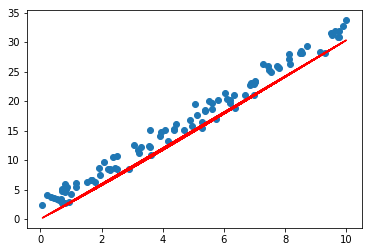

In [11]:
#por EJEMPLO creo la matriz de grado 3 y la grafico
matriz_v3=armar_matriz_vandermonde(x, 3)
# print(matriz_v3.T)
rl= linear_model.LinearRegression()
rl.fit(matriz_v3,y)
plt.scatter(x,y)
plt.plot(x, rl.coef_[3] * x**3 + rl.coef_[2] * x**2 + rl.coef_[1] * x + rl.coef_[0],color='r')


In [12]:
def ajuste_RL_k(x,y,k):
    m=armar_matriz_vandermonde(x,k)
    rl=linear_model.LinearRegression()
    rl.fit(m,y)
    return rl.coef_

In [13]:
def error_cuadratico_medio(coef,x,y):
    #armo el y predicto
    y_predict = np.zeros((len(x), 1))
    for i  in range(len(x)):
        for j in range(coef.size):
            y_predict[i]=y_predict[i]+coef[j]*(x[i]**j)
    error=0
    for i in range(y_predict.size):
        error = error + (y_test[i] - y_predict[i])**2
    error=error/i
    return error


In [28]:
coef=ajuste_RL_k(x_train,y_train,3)
error_cuadratico_medio(coef,x_test,y_test)

array([6.43149936])

In [29]:
#3
e=np.zeros(25)
for i in range(25):
    e[i]=error_cuadratico_medio(ajuste_RL_k(x_train,y_train,i),x_test,y_test)
e.min()

2.034777129888078

In [30]:
#4
e=np.zeros(25)
for i in range(10): #repito 10 veces lo mismo y lo imprimo
    rdm.seed(30)
    x=rdm.rand(100)*10
    y=3*x + 2 + rdm.randn(100)
    training_index=rdm.choice(range(n),size=s,replace=False)
    test_index=np.setdiff1d(range(n),training_index,False)
    x_train=x[training_index] 
    y_train=y[training_index]
    x_test=x[test_index]
    y_test=y[test_index]
    for i in range(25):
        e[i]=error_cuadratico_medio(ajuste_RL_k(x_train,y_train,i),x_test,y_test)
    print(e.min())
    

2.034777129888078
2.034777129888078
2.034777129888078
2.034777129888078
2.034777129888078
2.034777129888078
2.034777129888078
2.034777129888078
2.034777129888078
2.034777129888078


3.Parta  el  conjunto  original  de  100  pares  en k∈N folds.

In [95]:
def k_folds(x,y,k):
    z_x=x
    z_y=y
    rdm.shuffle(z_x)
    rdm.shuffle(z_y)
    a=np.split(z_x,k)
    b=np.split(z_y,k)
    return a,b
x_folds, y_folds =k_folds(x,y,20)

TypeError: only size-1 arrays can be converted to Python scalars

In [76]:
# Seleccione un fold F y use los demas para ajustar una regresion y el fold F para evaluar el error cometido EF

x_folds, y_folds =k_folds(x,y,10) #creo los folds
x_f_test=np.asarray(x_folds[0]).flatten() # agarro uno cualquiera como el test x
x_f_train=np.asarray(x_folds[1:10]).flatten() # el resto son train x
y_f_test=np.asarray(y_folds[0]).flatten() # agarro uno cualquiera como el test y
y_f_train=np.asarray(y_folds[1:10]).flatten() # el resto son train y


In [33]:
coef=ajuste_RL_k(x_f_train,y_f_train,3) #ajusto
error_cuadratico_medio(coef,x_test,y_test) #calculo error

array([757.11879736])

In [34]:
#Repita para regresiones lineales de diferente grado, como antes.
e=np.zeros(25)
for i in range(25):
    e[i]=error_cuadratico_medio(ajuste_RL_k(x_f_train,y_f_train,i),x_f_test,y_f_test)
e.min()

41.45209651052315

In [69]:
# Calcule el error medio (promedio) cuando F recorre todos los folds.
def error_medio_k_folds(k,x,y,n): #siendo k el numero de folds, x y y los conjuntos de examen y el n el orden del ajuste que se quiere hacer
    x_folds, y_folds =k_folds(x,y,10) #creo los folds
    sum_e=0
    for i in range(x.size/k):
        print(i)
        x_f_test=np.asarray(x_folds[i]).flatten() # agarro uno cualquiera como el test x
        x_f_train=np.delete(np.asarray(x_folds),i,0).flatten() # el resto son train x
        y_f_test=np.asarray(y_folds[i]).flatten() # agarro uno cualquiera como el test y
        y_f_train=np.delete(np.asarray(y_folds),i,0).flatten() # el resto son train y
        sum_e=sum_e + error_cuadratico_medio(ajuste_RL_k(x_f_train,y_f_train,n),x_f_test,y_f_test)
    return (sum_e)/k


100